In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, FancyArrowPatch
import numpy as np
import astropy.io.ascii as at
import astropy.units as u
import astropy.constants as const

In [2]:
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos/')

Mounted at /content/drive


In [ ]:
def plot_ellipse(ax,sun_x,sun_y,ecc,semimajoraxis):
    """Plot an elliptical orbit given the Sun's position and orbital e and a
    """
    semiminoraxis = semimajoraxis*np.sqrt(1-ecc**2)
    peri = semimajoraxis*(1-ecc)
    centerfocus = semimajoraxis-peri
    x_center = sun_x + centerfocus
    y_center = sun_y
    ellipse = Ellipse((x_center,y_center),width=2*semimajoraxis,
                      height=2*semiminoraxis,edgecolor="k",
                      facecolor="none")
    ax.add_patch(ellipse)
    plt.plot(sun_x,sun_y,'o',mec="k",mfc="C1",ms=10)
    plt.plot(x_center+centerfocus,sun_y,'o',mec="k",mfc="none",ms=10)


In [ ]:
def plot_ellipse_centered(ax,x_center, y_center,ecc,semimajoraxis):
    """Plot an elliptical orbit given the Sun's position and orbital e and a
    """
    semiminoraxis = semimajoraxis*np.sqrt(1-ecc**2)
    peri = semimajoraxis*(1-ecc)
    centerfocus = semimajoraxis-peri
    sun_x = x_center - centerfocus
    sun_y = y_center
    ellipse = Ellipse((x_center,y_center),width=2*semimajoraxis,
                      height=2*semiminoraxis,edgecolor="k",
                      facecolor="none")
    ax.add_patch(ellipse)
    plt.plot(sun_x,sun_y,'o',mec="k",mfc="C1",ms=10)
    plt.plot(x_center+centerfocus,sun_y,'o',mec="k",mfc="none",ms=10)


In [ ]:
def plot_planet(ecc,semimajoraxis,ax=None):
    """Plot an elliptical orbit with the given orbital e and a, and make it pretty
    """
    if ax is None:
        plt.figure(figsize=(5,5))
        ax = plt.subplot(111)
    plot_ellipse(ax,0,0,ecc,semimajoraxis)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    ax.set_yticks([-2,-1,0,1,2])
    ax.grid("true",zorder=-11)
    plt.xlabel("X")
    plt.ylabel("Y")
    # plt.title(f"a={semimajoraxis:.1f}, e={ecc:.2f}")

In [ ]:
# plt.figure(figsize=(8,8))
# eccentricities = np.random.rand(4)*0.9
# randi = np.random.randint(0,4)
# eccentricities[randi] = 0
# for i,ecc in enumerate(eccentricities):
#     print(i,ecc)
#     ax = plt.subplot(2,2,i+1)
#     plot_planet(ecc,1,ax=ax)
# plt.subplots_adjust(hspace=0.3,wspace=0.3)

In [ ]:
# # Plot a set of four ellipses: one with a circular orbit and three with random e
# for j in range(30):
#     plt.figure(figsize=(8,8))
#     eccentricities = np.random.rand(4)*0.9
#     randi = np.random.randint(0,4)
#     eccentricities[randi] = 0
#     for i,ecc in enumerate(eccentricities):
#         print(i,ecc)
#         ax = plt.subplot(2,2,i+1)
#         plot_planet(ecc,1,ax=ax)
#     plt.subplots_adjust(hspace=0.3,wspace=0.3)
#     plt.suptitle("Name: ",fontsize=16,y=0.94,x=0.2)
#     plt.savefig(f"ellipse_checkout_{j}.png",dpi=600)
#     plt.close()

In [ ]:
def plot_ellipse_for_labeling(ax,sun_x,sun_y,ecc,semimajoraxis):
    """
    Plot a blank elliptical orbit that students can label. 

    Includes: foci (with one Sun), (semi)major axis, (semi)major axis, center
    """
    semiminoraxis = semimajoraxis*np.sqrt(1-ecc**2)
    peri = semimajoraxis*(1-ecc)
    centerfocus = semimajoraxis-peri
    x_center = sun_x + centerfocus
    y_center = sun_y
    # Plot the ellipse itself
    ellipse = Ellipse((x_center,y_center),width=2*semimajoraxis,
                      height=2*semiminoraxis,edgecolor="k",
                      facecolor="none")
    ax.add_patch(ellipse)

    # Add foci
    sun = Circle((sun_x,sun_y),radius=0.1,facecolor="gold",edgecolor="none",zorder=5)
    focus = Circle((x_center+centerfocus,sun_y),radius=0.1,facecolor="w",
                   edgecolor="k",linestyle="--",zorder=6,lw=1.5)
    ax.add_patch(sun)
    ax.add_patch(focus)

    # Major and minor axes
    plt.plot([x_center-semimajoraxis,x_center+semimajoraxis],[y_center,y_center],"k--")
    plt.plot([x_center,x_center],[y_center-semiminoraxis,y_center+semiminoraxis],"k-")

    # Center
    plt.plot(x_center,y_center,'o',ms=12)

    # Semimajor and Semiminor axes
    aa = FancyArrowPatch([x_center,y_center-0.1],[x_center+semimajoraxis,y_center-0.1],
                         arrowstyle="|-|",mutation_scale=10,color="C1",linewidth=2)
    ax.add_patch(aa)
    aa = FancyArrowPatch([x_center,y_center-0.1],[x_center+semimajoraxis,y_center-0.1],
                         arrowstyle="<|-|>",mutation_scale=10,color="C1",linewidth=2)
    ax.add_patch(aa)
    bb = FancyArrowPatch([x_center+0.1,y_center],[x_center+0.1,y_center+semiminoraxis],
                         arrowstyle="|-|",mutation_scale=10,color="C2",linewidth=2)
    ax.add_patch(bb)
    bb = FancyArrowPatch([x_center+0.1,y_center],[x_center+0.1,y_center+semiminoraxis],
                         arrowstyle="<|-|>",mutation_scale=10,color="C2",linewidth=2)
    ax.add_patch(bb)


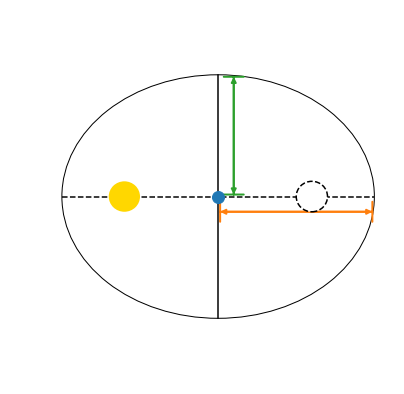

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.subplot(111)
plot_ellipse_for_labeling(ax,0,0,0.6,1)
plt.xlim(-0.75,1.75)
plt.ylim(-1.25,1.25)
ax.axis('off')
plt.savefig("figures/ellipse_unlabeled.png",dpi=600,bbox_inches="tight")

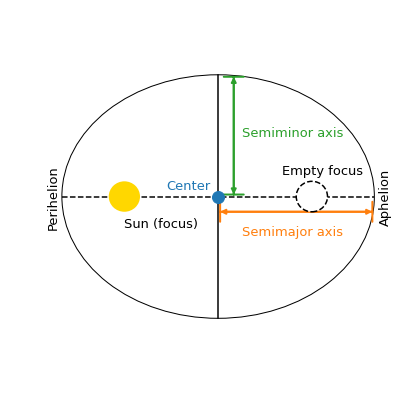

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.subplot(111)
plot_ellipse_for_labeling(ax,0,0,0.6,1)
plt.xlim(-0.75,1.75)
plt.ylim(-1.25,1.25)
ax.axis('off')

plt.text(0,-0.2,"Sun (focus)",fontsize=13)
plt.savefig("ellipse_labeled1.png",dpi=600,bbox_inches="tight")
plt.text(1.01,0.15,"Empty focus",fontsize=13)
plt.savefig("ellipse_labeled2.png",dpi=600,bbox_inches="tight")
plt.text(0.55,0.05,"Center",color="C0",horizontalalignment="right",fontsize=13)
plt.savefig("ellipse_labeled3.png",dpi=600,bbox_inches="tight")
plt.text(0.75,-0.25,"Semimajor axis",color="C1",fontsize=13)
plt.savefig("ellipse_labeled4.png",dpi=600,bbox_inches="tight")
plt.text(0.75,0.4,"Semiminor axis",color="C2",fontsize=13)
plt.savefig("ellipse_labeled5.png",dpi=600,bbox_inches="tight")
plt.text(-0.5,0,"Perihelion",rotation=90,fontsize=13,verticalalignment="center")
plt.savefig("ellipse_labeled6.png",dpi=600,bbox_inches="tight")
plt.text(1.63,0,"Aphelion",rotation=90,fontsize=13,verticalalignment="center")
plt.savefig("ellipse_labeled7.png",dpi=600,bbox_inches="tight")

plt.savefig("figures/ellipse_labeled.png",dpi=600,bbox_inches="tight")

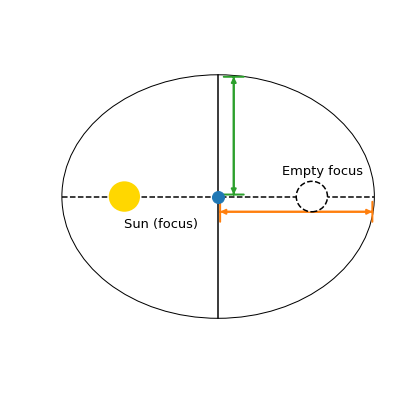

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.subplot(111)
plot_ellipse_for_labeling(ax,0,0,0.6,1)
plt.xlim(-0.75,1.75)
plt.ylim(-1.25,1.25)
ax.axis('off')

plt.text(0,-0.2,"Sun (focus)",fontsize=13)
plt.text(1.01,0.15,"Empty focus",fontsize=13)
plt.savefig("figures/ellipse_foci.png",dpi=600,bbox_inches="tight")

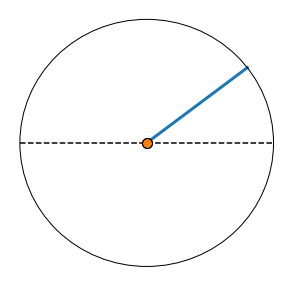

In [ ]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
x_center, y_center = 0, 0
ecc, semimajoraxis = 0, 1
plot_ellipse(ax,x_center, y_center, ecc, semimajoraxis)
ax.axis("off")
# Major and minor axes


plt.plot([x_center-semimajoraxis,x_center+semimajoraxis],[y_center,y_center],
         "k--",zorder=-1)

draw_angle = 75*np.pi/360
draw_x = semimajoraxis * np.cos(draw_angle)
draw_y = semimajoraxis * np.sin(draw_angle)
plt.plot([x_center,draw_x],[y_center,draw_y],'-',zorder=0,lw=3,color="C0")

plt.savefig("figures/ellipse_circle_radius.png",dpi=600,bbox_inches="tight")

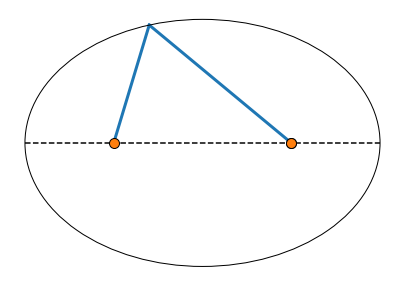

In [ ]:

plt.figure(figsize=(7,5))
ax = plt.subplot(111)
sun_x, sun_y = 0, 0
ecc, semimajoraxis = 0.5, 1
plot_ellipse(ax, sun_x, sun_y, ecc, semimajoraxis)
ax.axis("off")
# Major and minor axes

semiminoraxis = semimajoraxis*np.sqrt(1-ecc**2)
peri = semimajoraxis*(1-ecc)
centerfocus = semimajoraxis-peri
x_center = sun_x + centerfocus

plt.plot([x_center-semimajoraxis,x_center+semimajoraxis],[y_center,y_center],
         "k--",zorder=-1)



draw_x = 0.2
draw_y = np.sqrt((1-(draw_x-x_center)**2/semimajoraxis**2) * semiminoraxis**2)+y_center



# draw_angle = 75*np.pi/360
# draw_x = semimajoraxis * np.cos(draw_angle)
# draw_y = semimajoraxis * np.sin(draw_angle)
plt.plot([x_center+centerfocus,draw_x],[y_center,draw_y],'-',zorder=0,lw=3,color="C0")
plt.plot([x_center-centerfocus,draw_x],[y_center,draw_y],'-',zorder=0,lw=3,color="C0")
plt.plot(x_center+centerfocus,y_center,'o',mec="k",mfc="C1",ms=10)
plt.savefig("figures/ellipse_foci_distance.png",dpi=600,bbox_inches="tight")

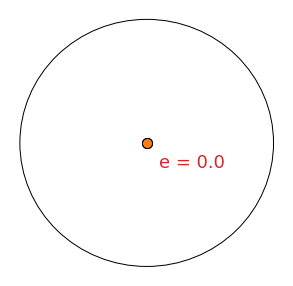

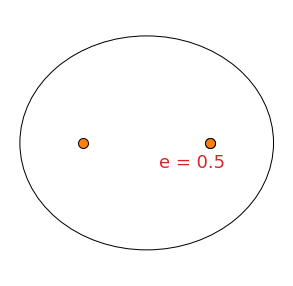

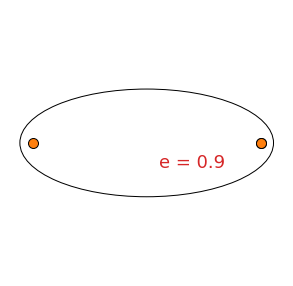

In [ ]:
for ecc in [0,0.5,0.9]:
    plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    x_center, y_center = 0, 0
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    semimajoraxis = 1
    peri = semimajoraxis*(1-ecc)
    centerfocus = semimajoraxis-peri

    plot_ellipse_centered(ax,x_center, y_center, ecc, semimajoraxis)
    plt.plot(x_center+centerfocus,y_center,'o',mec="k",mfc="C1",ms=10)
    ax.axis("off")

    ax.text(x_center+0.1,y_center-0.2,f"e = {ecc:.1f}",fontsize=18,color="C3")
    plt.savefig(f"figures/ellipse_ecc{ecc:.1f}.png",dpi=600,bbox_inches="tight")
    # plt.close()

# Kepler's Third Law

In [4]:
dat = at.read("catalogs/planet_P_a.txt")

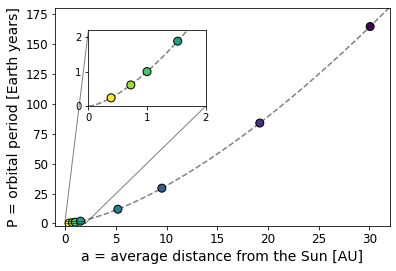

In [5]:
aa = np.linspace(0.001,32,1000)
pp = aa**1.5

fig, ax = plt.subplots()

ax.plot(aa,pp,"--",zorder=-10,color="grey")
ax.scatter(dat["a(AU)"],dat["P(days)"]/365.25,c=np.linspace(0.2,1,8),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
ax.set_xlabel("a = average distance from the Sun [AU]",fontsize=14)
ax.set_ylabel("P = orbital period [Earth years]",fontsize=14)
ax.set_xlim(-1,32)
ax.set_ylim(-2,180)
ax.tick_params(labelsize=12)

axins = ax.inset_axes([0.1,0.55,0.35,0.35])
axins.plot(aa,pp,"--",zorder=-10,color="grey")
axins.scatter(dat["a(AU)"],dat["P(days)"]/365.25,c=np.linspace(0.2,1,8),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
axins.set_xlim(0,2)
axins.set_ylim(0,2.2)

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.savefig("figures/kepler3_linear.png",dpi=600,bbox_inches="tight")

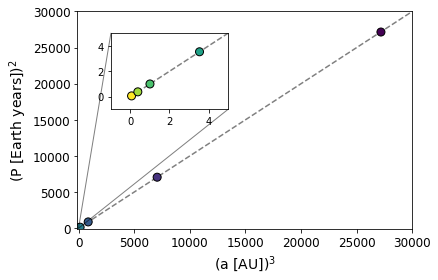

In [6]:
aa = np.linspace(0.001,32,1000)
pp = aa**1.5

fig, ax = plt.subplots()

x = dat["a(AU)"]**3
y = (dat["P(days)"]/365.25)**2

ax.plot(aa**3,pp**2,"--",zorder=-10,color="grey")
ax.scatter(x,y,c=np.linspace(0.2,1,8),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
ax.set_xlabel(r"(a [AU])$^3$",fontsize=14)
ax.set_ylabel(r"(P [Earth years])$^2$",fontsize=14)
ax.set_xlim(-100,3e4)
ax.set_ylim(-100,3e4)
ax.tick_params(labelsize=12)

axins = ax.inset_axes([0.1,0.55,0.35,0.35])
axins.plot(aa**3,pp**2,"--",zorder=-10,color="grey")
axins.scatter(x,y,c=np.linspace(0.2,1,8),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
axins.set_xlim(-1,5)
axins.set_ylim(-1,5)

ax.indicate_inset_zoom(axins, edgecolor="black")
plt.savefig("figures/kepler3_sq_cube.png",dpi=600,bbox_inches="tight")

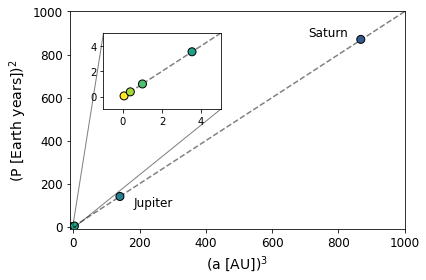

In [7]:
aa = np.linspace(0.001,32,1000)
pp = aa**1.5

fig, ax = plt.subplots()

x = dat["a(AU)"]**3
y = (dat["P(days)"]/365.25)**2

ax.plot(aa**3,pp**2,"--",zorder=-10,color="grey")
ax.scatter(x,y,c=np.linspace(0.2,1,8),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
ax.set_xlabel(r"(a [AU])$^3$",fontsize=14)
ax.set_ylabel(r"(P [Earth years])$^2$",fontsize=14)
ax.set_xlim(-10,1e3)
ax.set_ylim(-10,1e3)
ax.tick_params(labelsize=12)

axins = ax.inset_axes([0.1,0.55,0.35,0.35])
axins.plot(aa**3,pp**2,"--",zorder=-10,color="grey")
axins.scatter(x,y,c=np.linspace(0.2,1,8),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
axins.set_xlim(-1,5)
axins.set_ylim(-1,5)

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.text(dat["a(AU)"][4]**3+40,(dat["P(days)"][4]/365.25)**2,"Jupiter",
        fontsize=12,verticalalignment="top")

ax.text(dat["a(AU)"][5]**3-40,(dat["P(days)"][5]/365.25)**2,"Saturn",
        fontsize=12,verticalalignment="bottom",horizontalalignment="right")
plt.savefig("figures/kepler3_sq_cube2.png",dpi=600,bbox_inches="tight")

## Add jupiter's moons

In [8]:
dat2 = at.read("catalogs/jupiter_satellites_nasa.txt",delimiter="\t")
dat2.sort("a(1e3km)")
dat2.dtype

dtype([('Name', '<U30'), ('a(1e3km)', '<f8'), ('a(Rjup)', '<f8'), ('Porb(d)', '<f8'), ('Prot(d)', '<U3'), ('i(deg)', '<f8'), ('e', '<f8')])

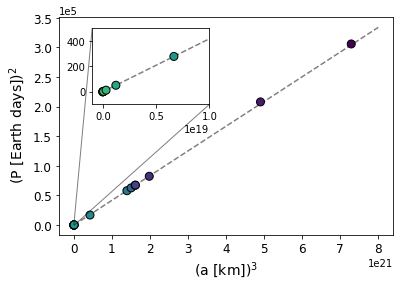

In [19]:
aa = np.linspace(1e3,2e7,1000)*u.km
kep_const = np.pi**2*4/const.G/(1*u.jupiterMass)
pp_sq = (kep_const * aa**3).to(u.day**2)

fig, ax = plt.subplots()

use = dat2["a(1e3km)"]<2e4
nuse = len(np.where(use)[0])

x = (dat2["a(1e3km)"][use]*1e3)**3
y = (dat2["Porb(d)"][use])**2

ax.plot((aa**3).to(u.km**3).value,pp_sq.to(u.day**2).value,"--",zorder=-10,color="grey")
ax.scatter(x,y,c=np.linspace(0.2,1,nuse),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
ax.set_xlabel(r"(a [km])$^3$",fontsize=14)
ax.set_ylabel(r" (P [Earth days])$^2$",fontsize=14)
# ax.set_xlim(-100,3e4)
# ax.set_ylim(-100,3e4)
ax.tick_params(labelsize=12)
ax.ticklabel_format(axis='both',style="sci",scilimits=(0,0))
# ax.get_xaxis().get_major_formatter().set_useOffset(False)
# ax.get_yaxis().get_major_formatter().set_useOffset(True)
# ax.tick_params(labelleft=False,labelbottom=False)
plt.savefig("figures/kepler3_sq_cube_jupiter_noinset.png",dpi=600,bbox_inches="tight")

axins = ax.inset_axes([0.1,0.6,0.35,0.35])
axins.plot((aa**3).to(u.km**3).value,pp_sq.to(u.day**2).value,"--",zorder=-10,color="grey")
axins.scatter(x,y,c=np.linspace(0.2,1,nuse),marker='o',
           cmap="viridis_r",s=64,edgecolor="k",zorder=1)
axins.set_xlim(-1e18,1e19)
axins.set_ylim(-1e2,5e2)
# axins.tick_params(labelleft=False,labelbottom=False)

ax.indicate_inset_zoom(axins, edgecolor="black")
plt.savefig("figures/kepler3_sq_cube_jupiter.png",dpi=600,bbox_inches="tight")

<Quantity 1.88279979e+11 kg s2 / (jupiterMass m3)>